In [1]:
from matplotlib import pyplot as plt
import numpy as np
import analysisFunctions as aF
from scipy import signal
from scipy.ndimage import gaussian_filter, median_filter
from scipy.stats import sem
import seaborn as sns
import seaborn_image as isns
import cmcrameri.cm as cmc
cmap = 'cmc.batlow'

## Opening and sorting data

In [2]:
pathBase = r"C:\Users\gabri\Desktop\testAnalyse"

violet = np.loadtxt(pathBase + "\\csv\\405.csv", skiprows=1, delimiter=',')
violet = violet[:,1]
blue = np.loadtxt(pathBase + "\\csv\\470.csv", skiprows=1, delimiter=',')
blue = blue[:,1]
green = np.loadtxt(pathBase + "\\csv\\530.csv", skiprows=1, delimiter=',')
green = green[:,1]
red = np.loadtxt(pathBase + "\\csv\\625.csv", skiprows=1, delimiter=',')
red = red[:,1]

violet_t = np.load(pathBase + "\\405ts.npy")
blue_t = np.load(pathBase + "\\470ts.npy")
green_t = np.load(pathBase + "\\530ts.npy")
red_t = np.load(pathBase + "\\625ts.npy")

np.savetxt(pathBase+'\\blue_t.txt', blue_t)
FPS = 40/5
endTime = (1/FPS) * violet.shape[0]
timestamp = np.linspace(0, int(endTime), int(violet.shape[0]))


## Plotting raw data

Text(0, 0.5, 'normalized intensity signal (-)')

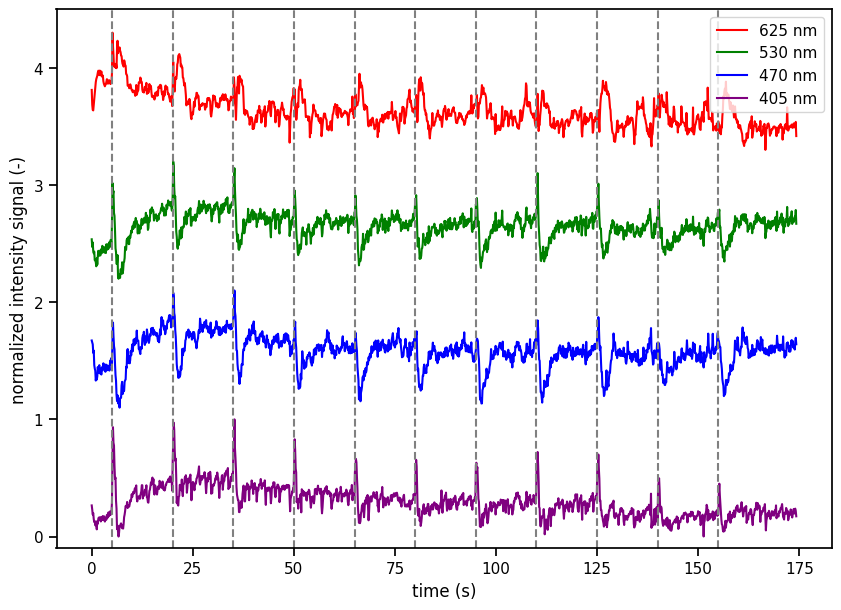

In [3]:
# fig = plt.figure(figsize=(10, 7))
sns.set_context('notebook')


mod_violet = aF.normalizeData(violet, dim=1)
mod_blue = aF.normalizeData(blue, dim=1)
mod_green = aF.normalizeData(green, dim=1)
mod_red = aF.normalizeData(red, dim=1)

AP = np.array(list(range(11))) * 15 + 5

fig = plt.figure(figsize=(10, 7))
plt.plot(red_t, mod_red+3.3, color='red', label='625 nm')
plt.plot(green_t, mod_green+2.2, color='green', label='530 nm')
plt.plot(blue_t, mod_blue+1.1, color='blue', label='470 nm')
plt.plot(violet_t, mod_violet, color='purple', label='405 nm')
plt.vlines(AP, -0.1, 4.5, color='grey', linestyles='--')


plt.legend()
plt.ylim(-0.1, 4.5)
# plt.xlim(0, 80)
# plt.xlim(0, 40)
plt.xlabel("time (s)")
plt.ylabel("normalized intensity signal (-)")
# ax = plt.gca()
# ax.set_yticklabels([])
# ax.set_yticks([])
# sns.despine()
# plt.savefig("raw_signal_zoom.png", dpi=600)



## Comparaison bleu, vert et mauve

C:\Users\gabri\AppData\Local\Temp\ipykernel_21280\294116284.py:9: RuntimeWarning: divide by zero encountered in divide
  plt.plot(timestamp, (mod_blue/mod_green)+2.6, color='springgreen', label='hemodynamic correction b/g')
C:\Users\gabri\AppData\Local\Temp\ipykernel_21280\294116284.py:11: RuntimeWarning: divide by zero encountered in divide
  plt.plot(timestamp,  (mod_blue/mod_violet)+4.4, color='indigo', label='hemodynamic correction b/v')


[]

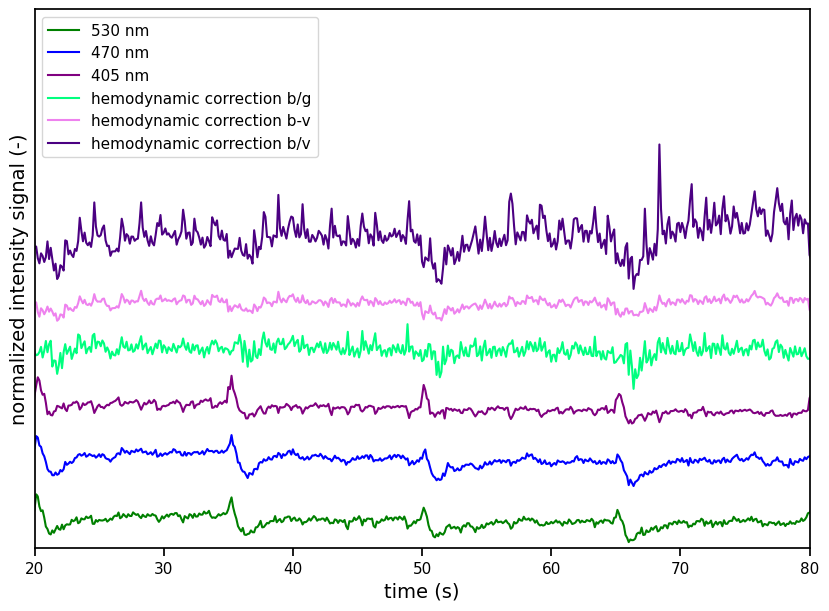

In [4]:
# import seaborn as sns
fig = plt.figure(figsize=(10, 7))
sns.set_context('notebook')

plt.plot(timestamp, mod_green, color='green', label='530 nm')
plt.plot(timestamp, mod_blue+1.1, color='blue', label='470 nm')
plt.plot(timestamp, mod_violet+2.2, color='purple', label='405 nm')

plt.plot(timestamp, (mod_blue/mod_green)+2.6, color='springgreen', label='hemodynamic correction b/g')
plt.plot(timestamp, (mod_blue-mod_violet)+4.4, color='violet', label='hemodynamic correction b-v')
plt.plot(timestamp,  (mod_blue/mod_violet)+4.4, color='indigo', label='hemodynamic correction b/v')


plt.legend()
plt.ylim(0, 10)
plt.xlim(20, 80)
plt.xlabel("time (s)", fontsize=14)
plt.ylabel("normalized intensity signal (-)", fontsize=14)
ax = plt.gca()
ax.set_yticklabels([])
ax.set_yticks([])
# plt.savefig("hemodynamic_correction_tries.png", dpi=600)

## Filtering

C:\Users\gabri\AppData\Local\Temp\ipykernel_21280\3760518613.py:1: RuntimeWarning: divide by zero encountered in divide
  hemo_corr = mod_blue/mod_green


(0.0, 4.0)

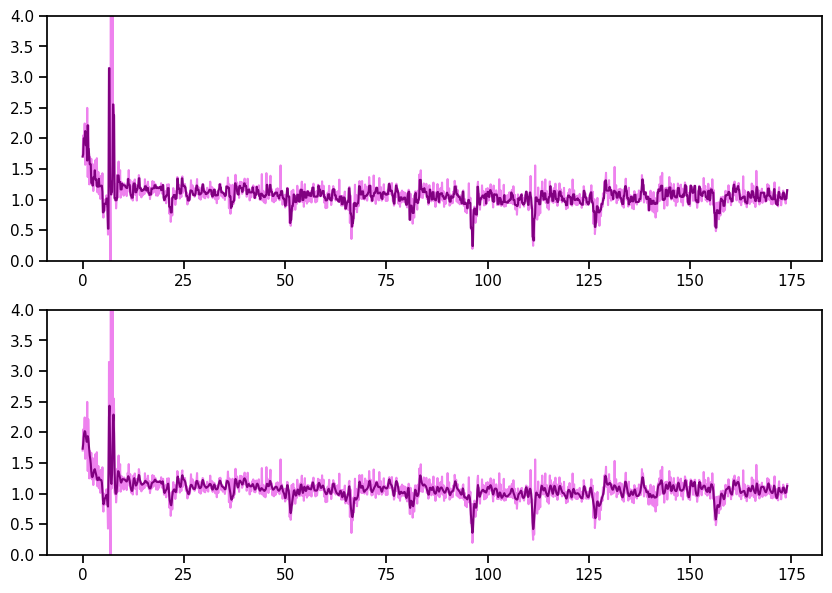

In [5]:
hemo_corr = mod_blue/mod_green

# sos = signal.butter(4, 0.05, btype='high', output='sos', fs=40)
# f_hemo_corr = signal.sosfilt(sos, hemo_corr)

fm_hemo_corr = median_filter(hemo_corr, size=3)
fg_hemo_corr = gaussian_filter(fm_hemo_corr, sigma=1)


fig = plt.figure(figsize=(10, 7))

ax1 = plt.subplot(2, 1, 1)
plt.plot(timestamp, hemo_corr, color='violet', label='530 nm')
plt.plot(timestamp, fm_hemo_corr, color='purple')
# plt.plot(timestamp, mod_red, color='red', label='625 nm')
plt.ylim(0, 4)

ax2 = plt.subplot(2, 1, 2)
# plt.plot(timestamp, green, color='green', label='530 nm')
# plt.plot(timestamp, red, color='red', label='625 nm')
plt.plot(timestamp, hemo_corr, color='violet', label='530 nm')
plt.plot(timestamp, fg_hemo_corr, color='purple')
plt.ylim(0, 4)
# plt.plot(timestamp, f_green)

## Réflectance

c:\Users\gabri\Documents\Université\Maitrise\Projet\Widefield-Imaging-Acquisition\analysisPipeline\analysisFunctions.py:96: RuntimeWarning: divide by zero encountered in log
  mu = (-1/X)* np.log(intensity/iniIntens)


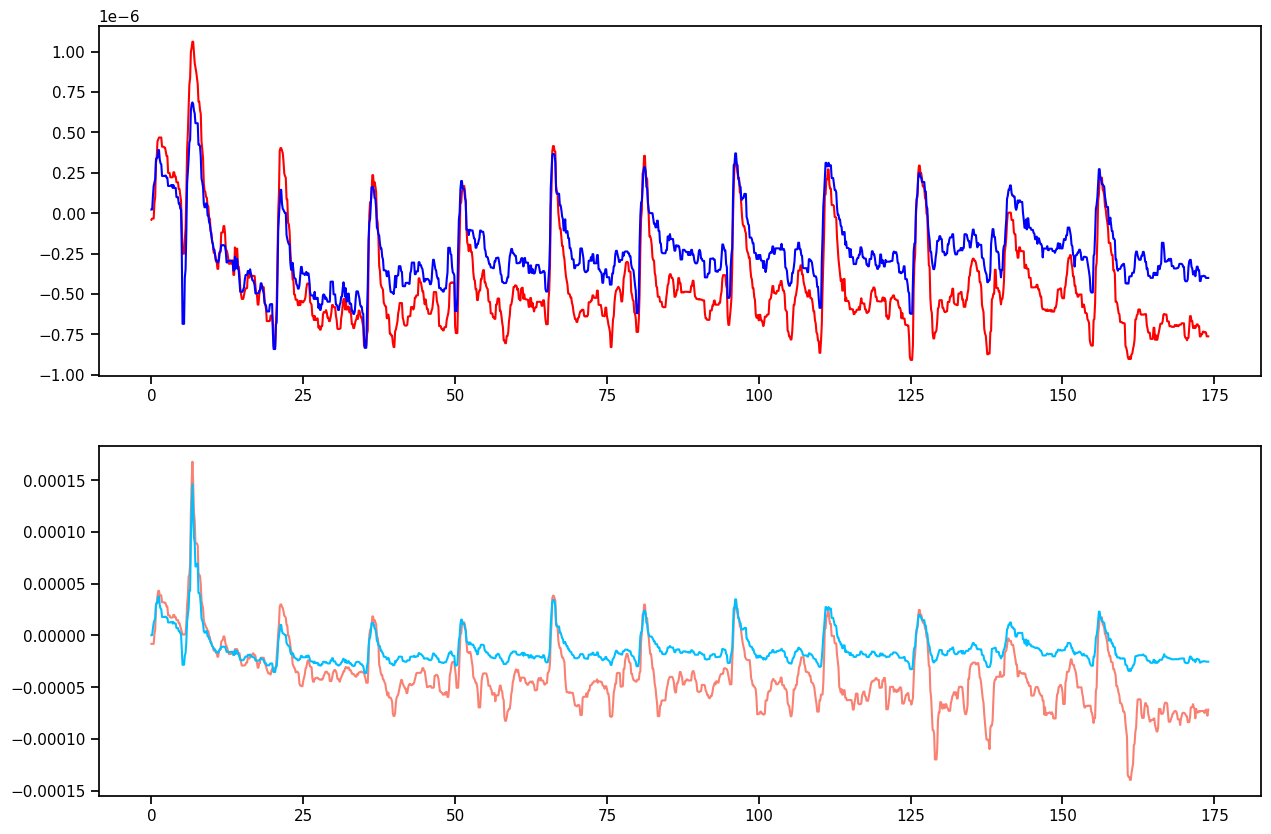

In [6]:
# %matplotlib qt 
%matplotlib inline
m_HbR, m_HbO = aF.oxygenation(mod_red, mod_green, dim=1)
HbR, HbO = aF.oxygenation(red, green, dim=1)

fig = plt.figure(figsize=(15, 10))

ax1 = plt.subplot(2, 1, 1)
ax1.plot(timestamp, median_filter(HbO, size=5), 'r')
ax1.plot(timestamp, median_filter(HbR, size=5), 'b')

# plt.plot(timestamp, mod_green, color='green', label='530 nm')
# plt.plot(timestamp, mod_red, color='red', label='625 nm')
# plt.xlim(60, 65)

fm_HbO = median_filter(m_HbO, size=5)
fm_HbR = median_filter(m_HbR, size=5)

ax2 = plt.subplot(2, 1, 2)
# ax2.plot(timestamp, m_HbO, 'r')
# ax2.plot(timestamp, m_HbR, 'b')
ax2.plot(timestamp, fm_HbO, color="salmon")
ax2.plot(timestamp, fm_HbR, color="deepskyblue")

# plt.xlim(20, 25)
# print(m_HbO)


## alignement data test

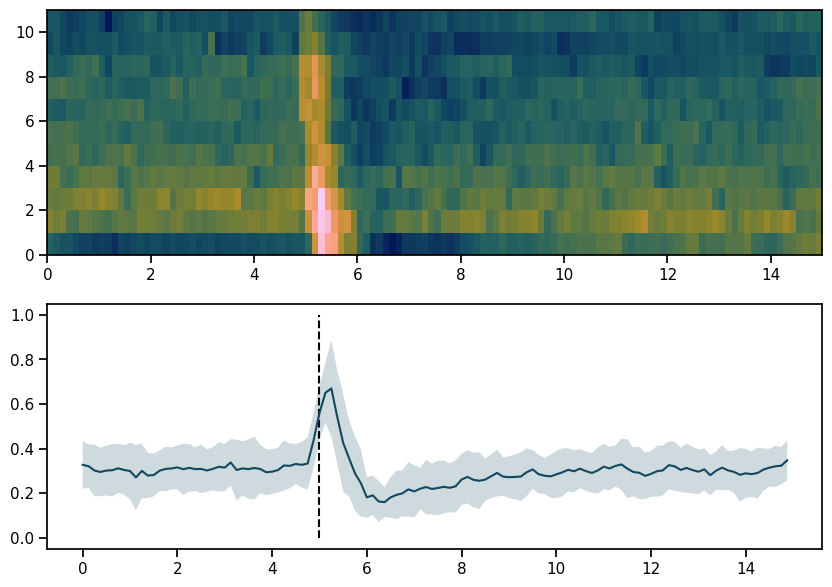

In [7]:

def superposeAP(timestamp, data, FPS=40, nChannels=5, percycle=15):
    sns.set_palette('cmc.batlow')
    FPSc = FPS/nChannels
    framespcycles = int(FPSc*percycle)
    ncycles = int(len(data)//framespcycles)
    nframes = int(framespcycles*ncycles)

    resh_timestamp = timestamp[:nframes].reshape(ncycles, framespcycles)
    resh_data = data[:nframes].reshape(ncycles, framespcycles)
    avg_data = np.mean(resh_data, axis=0)
    std_data = np.std(resh_data, axis=0)

    fig = plt.figure(figsize=(10, 7))

    ax1 = plt.subplot(2, 1, 1)
    ax1.imshow(resh_data, cmap='cmc.batlow', aspect='auto', origin='lower', extent=[0, percycle, 0, np.shape(resh_data)[0]])
    ax2 = plt.subplot(2, 1, 2)
    ax2.vlines(5, 0, 1, color='k', linestyles='--')
    ax2.plot(resh_timestamp[0,:], avg_data)
    # sns.lineplot(x=resh_timestamp[0,:], y=avg_data)
    ax2.fill_between(resh_timestamp[0,:], avg_data-std_data, avg_data+std_data, alpha=0.2)
    # fig.show()

    return None


superposeAP(timestamp, mod_violet)


## Frames Timestamps

In [8]:
from scipy.signal import find_peaks
from signal_analysis import SignalAnalysis

### alignés sur les max des peaks

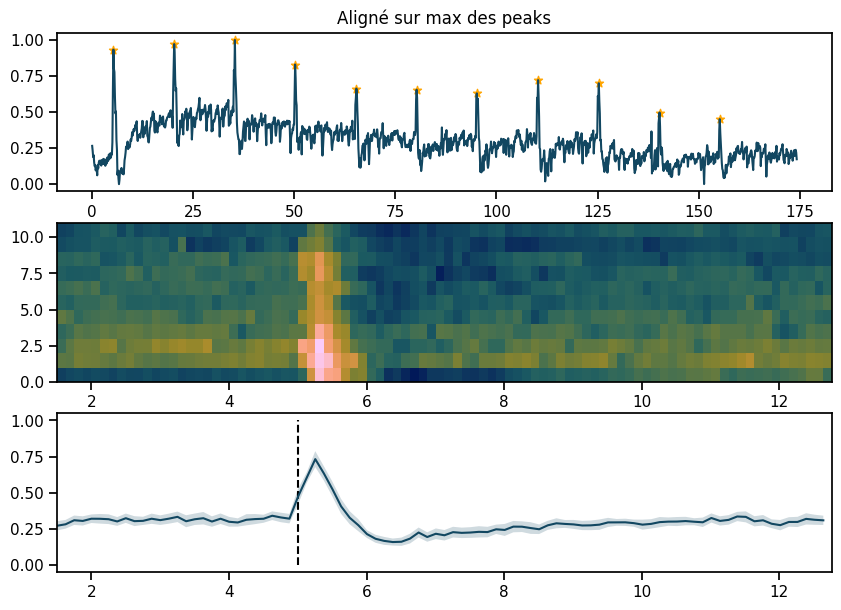

In [9]:
time, sig = (violet_t, mod_violet)
# time, sig = (blue_t, (mod_blue*-1 + 1))
# time, sig = (green_t, mod_green)
# time, sig = (red_t, mod_red)


percycle = 15
FPS = 40
nChannels = 5
FPSc = FPS/nChannels
framespcycles = int(FPSc*percycle)

peaks, _ = find_peaks(sig, distance=framespcycles-10, height=0.4)
# peaks = peaks[:-1]

fig = plt.figure(figsize=(10, 7))
ax1 = plt.subplot(3, 1, 1)
plt.title('Aligné sur max des peaks')
ax1.plot(time, sig)
ax1.scatter(time[peaks], sig[peaks], color='orange', marker='*')

inf = 30
sup = 60
aligned_data = np.zeros((len(peaks), inf+sup))
for i in range(len(peaks)):
  aligned_data[i,:] = sig[int(peaks[i]-inf):int(peaks[i]+sup)]
ax2 = plt.subplot(3, 1, 2)
ax2.imshow(aligned_data, origin='lower', extent=[time[peaks[0]-inf], time[peaks[0]+sup], 0, 11], aspect='auto', cmap=cmap)

avg_data = np.mean(aligned_data, axis=0)
# std_data = np.std(aligned_data, axis=0)
std_data = sem(aligned_data, axis=0)
ax3 = plt.subplot(3, 1, 3)
ax3.vlines(5, 0, 1, color='k', linestyles='--')
ax3.plot(time[peaks[0]-inf:peaks[0]+sup], avg_data)
ax3.fill_between(time[peaks[0]-inf:peaks[0]+sup], avg_data-std_data, avg_data+std_data, alpha=0.2)
ax3.set_xlim(time[peaks[0]-inf], time[peaks[0]+sup])

plt.show()

### Air puffs alignés

In [10]:
# tests fonctions de Antoine: signal_analysis.py
data = [[list(violet_t-10), list(mod_violet)], [list(blue_t), list(mod_blue)]]

res_data = SignalAnalysis().resample_dataset(data)


# plt.scatter(res_data[0][0], res_data[0][1])
# plt.scatter(res_data[1][0], res_data[1][1])
# plt.xlim(10, 25)


stat_data = SignalAnalysis().lag_matrix(data)
print("Full cross-correlations between all signals")
print("Lag array\n", stat_data["lag"])
print("Mean array\n", stat_data["mean"])
print("Median array\n", stat_data["median"])
print("STD array\n", stat_data["standard_deviation"])
print("CI lower array\n", stat_data["confidence_interval_lower"])
print("CI higher array\n", stat_data["confidence_interval_higher"])


Full cross-correlations between all signals
Lag array
 [[  0. -80.]
 [ 80.   0.]]
Mean array
 [[0.         5.08599815]
 [5.00750927 0.        ]]
Median array
 [[0.     5.0075]
 [5.0075 0.    ]]
STD array
 [[0.00000000e+00 5.05576716e-01]
 [8.56591309e-05 0.00000000e+00]]
CI lower array
 [[0.     5.0073]
 [5.0073 0.    ]]
CI higher array
 [[0.       6.001775]
 [5.0077   0.      ]]


In [31]:
# data LSCI

LSCI_t = np.load(r"C:\Users\gabri\Desktop\testAnalyse\07-18\785ts.npy")

data = np.loadtxt(r"C:\Users\gabri\Desktop\testAnalyse\07-18\785std.csv", delimiter=',', skiprows=1)
pt1 = gaussian_filter(data[:,1], sigma = 5)
pt2 = gaussian_filter(data[:,2], sigma = 5)
LSCI = aF.normalizeData(pt1, dim=1)*-1 + 1


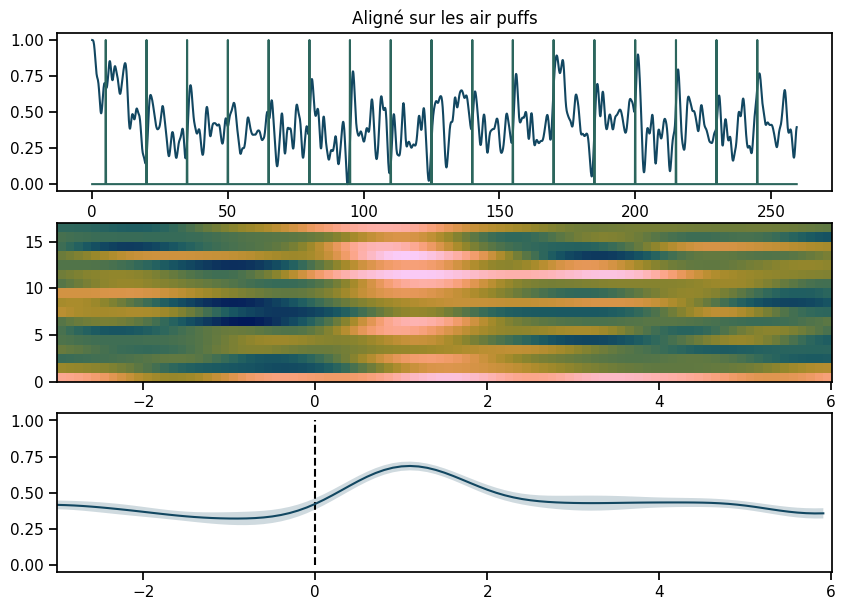

In [44]:
# time, sig = (violet_t, mod_violet)
# time, sig = (blue_t, mod_blue)
# time, sig = (green_t, mod_green)
# time, sig = (red_t, mod_red)
time, sig = (LSCI_t[:-1], LSCI)
FPS = 50

AP_idx = []
nChannels=5
AP_begin = 5
percycle=15
FPSc = FPS/nChannels
framespcycles = int(FPSc*percycle)
ncycles = int(len(time)//framespcycles)
AP_times = np.array(list(range(ncycles)))*15+5

for ti in AP_times:
    AP_idx.append(np.argmin(np.absolute(time-ti)))

# Dirac où AP dans times series
AP_series = np.zeros(len(time))
AP_series[AP_idx] = 1

fig = plt.figure(figsize=(10, 7))
ax1 = plt.subplot(3, 1, 1)
plt.title('Aligné sur les air puffs')
ax1.plot(time, sig)
ax1.plot(time, AP_series)
# ax1.set_xlim(0, 50)

inf = 30
sup = 60
aligned_data = np.zeros((len(AP_idx), inf+sup))
for i in range(len(AP_idx)):
  aligned_data[i,:] = sig[int(AP_idx[i]-inf):int(AP_idx[i]+sup)]
ax2 = plt.subplot(3, 1, 2)
ax2.imshow(aligned_data, origin='lower', extent=[time[AP_idx[0]-inf]-time[AP_idx[0]], time[AP_idx[0]+sup]-time[AP_idx[0]], 0, ncycles], aspect='auto', cmap=cmap)

avg_data = np.mean(aligned_data, axis=0)
# std_data = np.std(aligned_data, axis=0)
std_data = sem(aligned_data, axis=0)
ax3 = plt.subplot(3, 1, 3)
ax3.vlines(0, 0, 1, color='k', linestyles='--')
ax3.plot(time[AP_idx[0]-inf:AP_idx[0]+sup]-time[AP_idx[0]], avg_data)
ax3.fill_between(time[AP_idx[0]-inf:AP_idx[0]+sup]-time[AP_idx[0]], avg_data-std_data, avg_data+std_data, alpha=0.2)
ax3.set_xlim(time[AP_idx[0]-inf]-time[AP_idx[0]], time[AP_idx[0]+sup]-time[AP_idx[0]])

plt.show()





## correlation

2580
The lag is 0.24 s


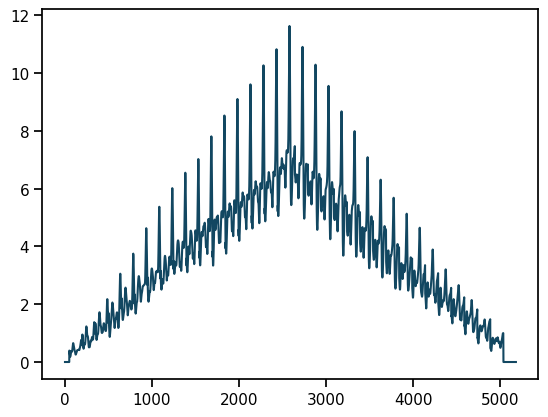

In [45]:
from scipy.signal import find_peaks, correlate

correlation = correlate(AP_series, sig)
# print(correlation)
lag = np.argmax(correlation)

# print(lag)
# print(len(time))
print('The lag is', (len(time)-lag)/FPS, 's')

plt.plot(correlation)

## 4 signaux alignés moyennés sur AP

In [34]:
times = (violet_t, blue_t, green_t, red_t)
sigs = (mod_violet, mod_blue, mod_green, mod_red)
cols = ('purple', 'blue', 'green', 'red')

inf = 30
sup = 60

avg_data = np.mean(aligned_data, axis=0)
std_data = sem(aligned_data, axis=0)

fig = plt.figure(figsize=(10, 5))

for time, sig, col in zip(times, sigs, cols):
  aligned_data = np.zeros((len(AP_idx), inf+sup))
  for i in range(len(AP_idx)):
    aligned_data[i,:] = sig[int(AP_idx[i]-inf):int(AP_idx[i]+sup)]
  avg_data = np.mean(aligned_data, axis=0)
  std_data = sem(aligned_data, axis=0)
  plt.plot(time[AP_idx[0]-inf:AP_idx[0]+sup]-time[AP_idx[0]], avg_data, color=col)
  plt.fill_between(time[AP_idx[0]-inf:AP_idx[0]+sup]-time[AP_idx[0]], avg_data-std_data, avg_data+std_data, alpha=0.2, color=col)

plt.vlines(0, 0, 1, color='k', linestyles='--')
plt.show()

ValueError: could not broadcast input array from shape (25,) into shape (90,)

<Figure size 1000x500 with 0 Axes>

## LSCI - 18 juillet

259.5215


(0.0, 150.0)

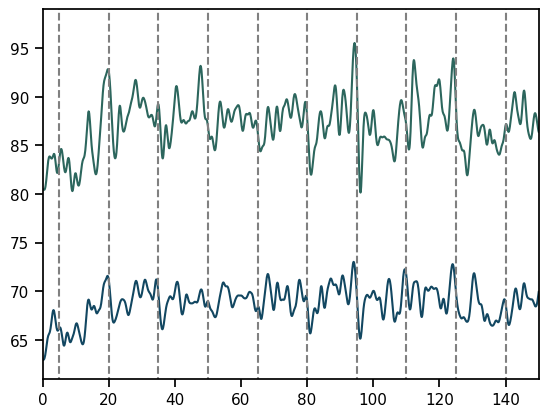

In [41]:
# data LSCI
ts = np.load(r"C:\Users\gabri\Desktop\testAnalyse\07-18\785ts.npy")
ts = ts[:-1]
data = np.loadtxt(r"C:\Users\gabri\Desktop\testAnalyse\07-18\785std.csv", delimiter=',', skiprows=1)
pt1 = gaussian_filter(data[:,1], sigma = 5)
pt2 = gaussian_filter(data[:,2], sigma = 5)

plt.plot(ts, pt1)
plt.plot(ts, pt2)
print(np.max(ts))
# air puffs
AP_idx = []
AP_begin = 5
percycle=15
nAP = (np.max(ts)-AP_begin)//percycle
AP_times = np.array(list(range(int(nAP+1))))*percycle+AP_begin
# print(AP_times)
for time in AP_times:
    AP_idx.append(np.argmin(np.absolute(ts-time)))

AP_times = ts[AP_idx]
# print(AP_times)

# plt.plot(ts, AP_series, color='grey', linestyle='--')
plt.vlines(AP_times, 50, 100, color='grey', linestyles='--')
plt.ylim(61, 99)
plt.xlim(0, 150)


## Correlation LSCI

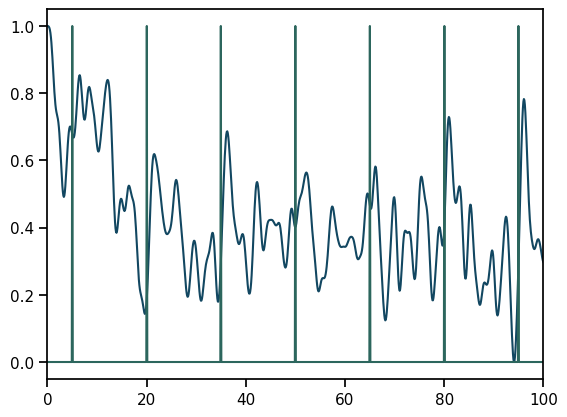

2580
2592
The lag is 0.24 s


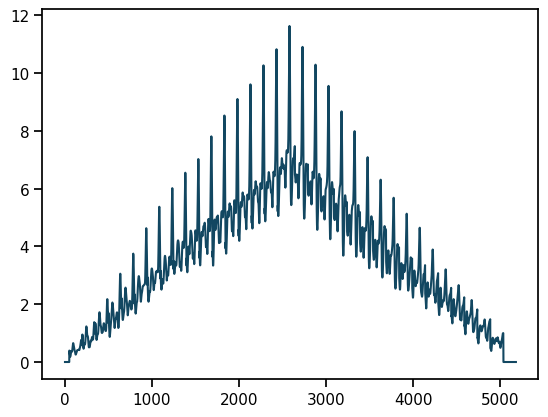

In [42]:
# pt1

pt1_norm = aF.normalizeData(pt1, dim=1)
pt1_inv = pt1_norm*-1+1

AP_series = np.zeros(len(ts))
AP_series[AP_idx] = 1

plt.plot(ts, pt1_inv)
plt.plot(ts, AP_series)
plt.xlim(0, 100)
plt.show()

correlation = correlate(AP_series, pt1_inv)
lag = np.argmax(correlation)
# print(lag)
# print(len(ts))

print('The lag is', (len(ts)-lag)/FPS, 's')

plt.plot(correlation)
